In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import random
random.seed(100)
import warnings
warnings.filterwarnings("ignore")

# Dataset:
The dataset that used in this system were collected from several website like *buddy4study.com scholarships.gov.in* and the data was under the process of augmentation and data validation.

In [6]:
df=pd.read_csv("scholar_data.csv")
df.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,INSPIRE Scholarship,Undergraduate,Male,General,Hindu,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
1,INSPIRE Scholarship,Undergraduate,Male,General,Hindu,Yes,Yes,No,90-100,Upto 1.5L,In,1
2,INSPIRE Scholarship,Undergraduate,Male,General,Muslim,Yes,Yes,Yes,90-100,Upto 1.5L,In,1
3,INSPIRE Scholarship,Undergraduate,Male,General,Muslim,Yes,Yes,No,90-100,Upto 1.5L,In,1
4,INSPIRE Scholarship,Undergraduate,Male,General,Chirstian,Yes,Yes,Yes,90-100,Upto 1.5L,In,1


In [7]:
cols = list(df.columns.values)
cols

['Name',
 'Education Qualification',
 'Gender',
 'Community',
 'Religion',
 'Exservice-men',
 'Disability',
 'Sports',
 'Annual-Percentage',
 'Income',
 'India',
 'Outcome']

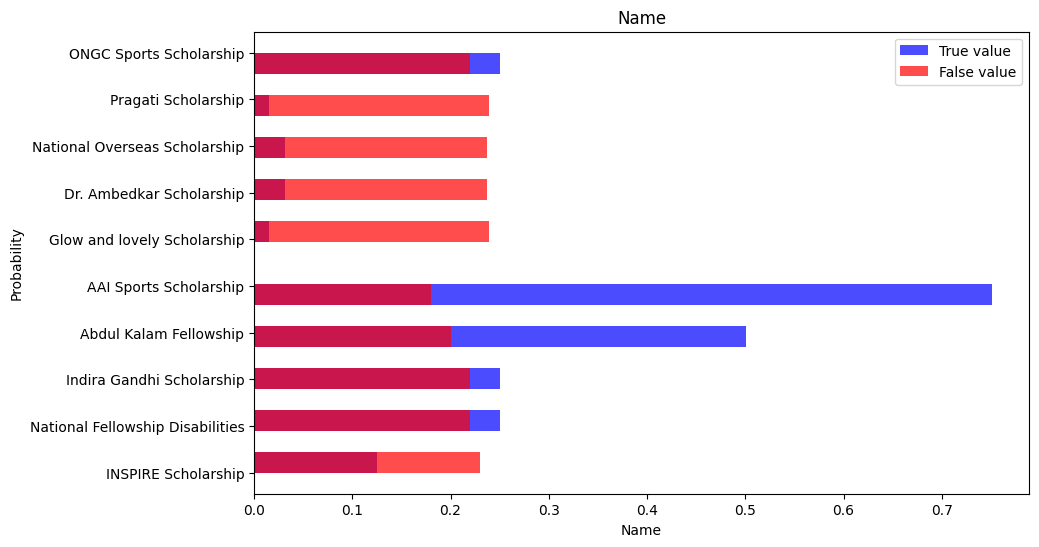

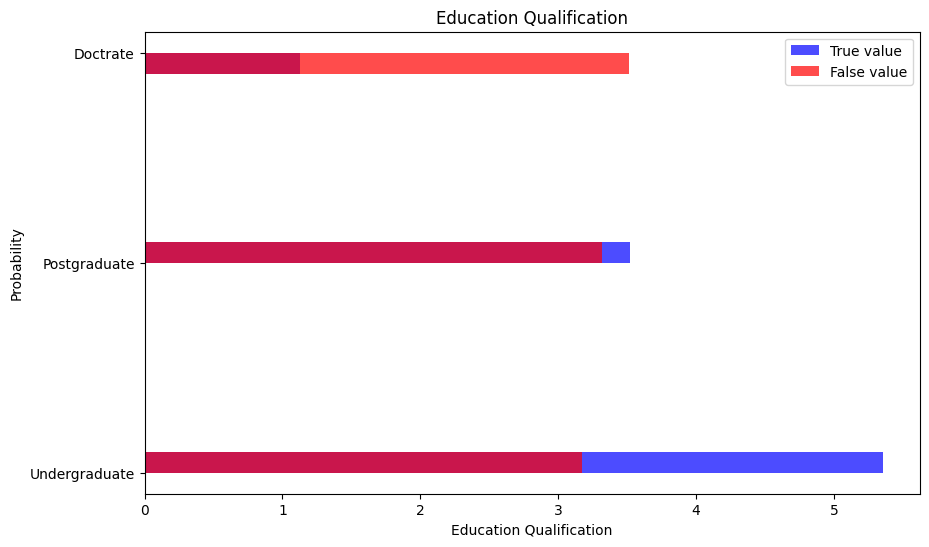

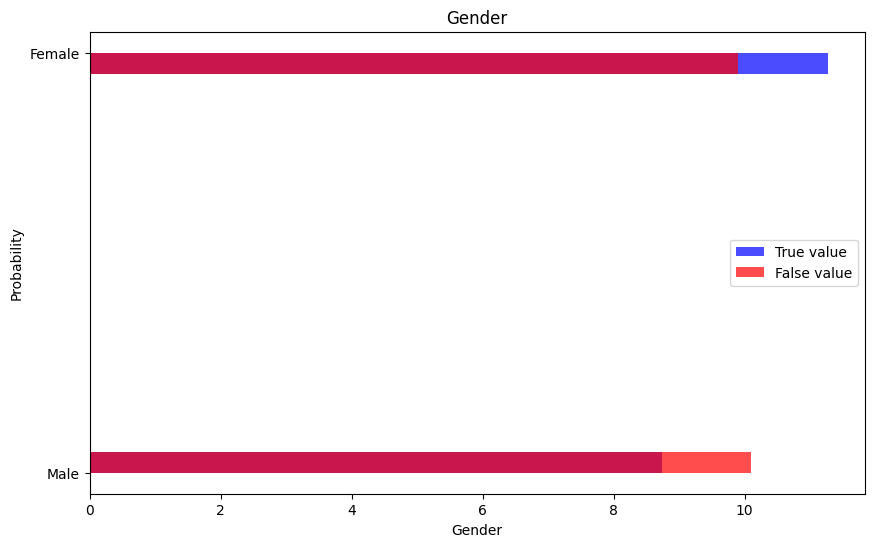

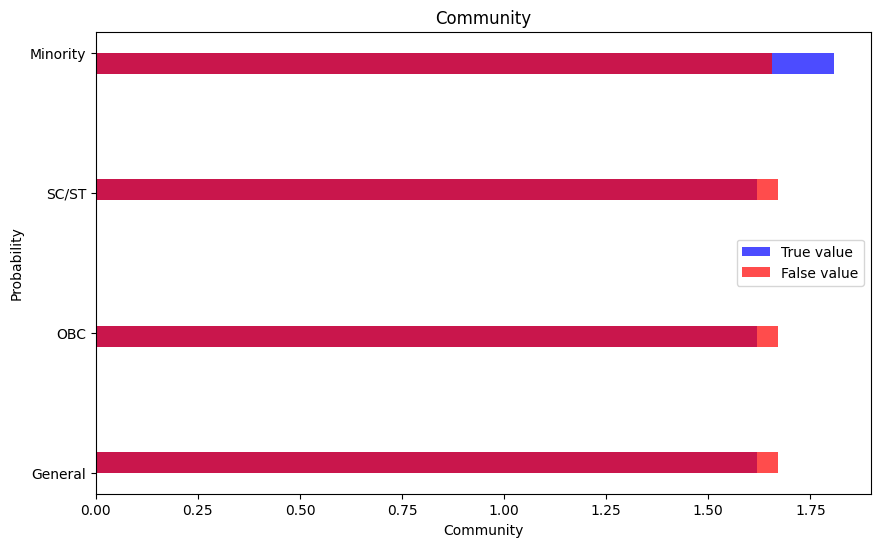

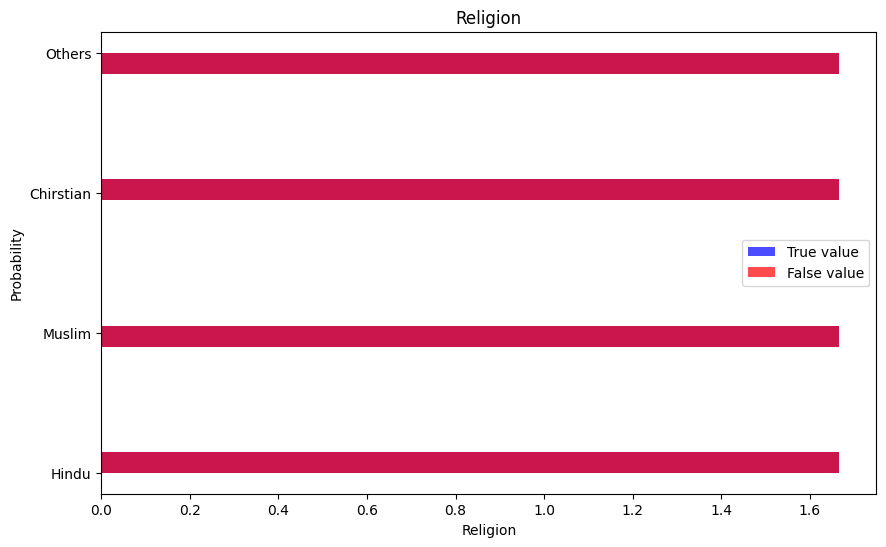

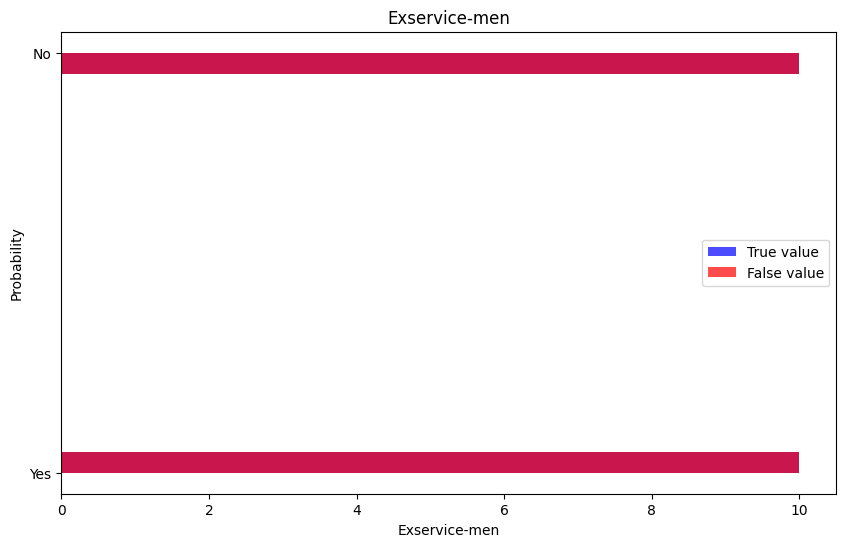

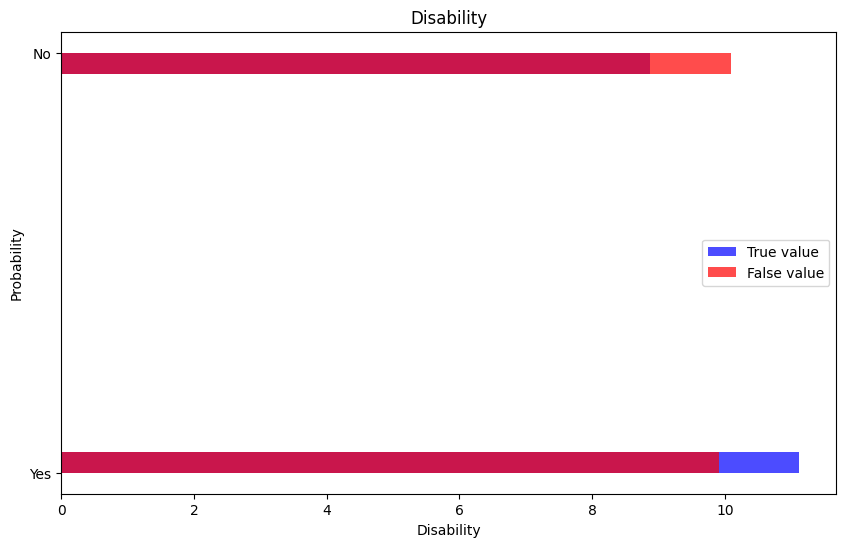

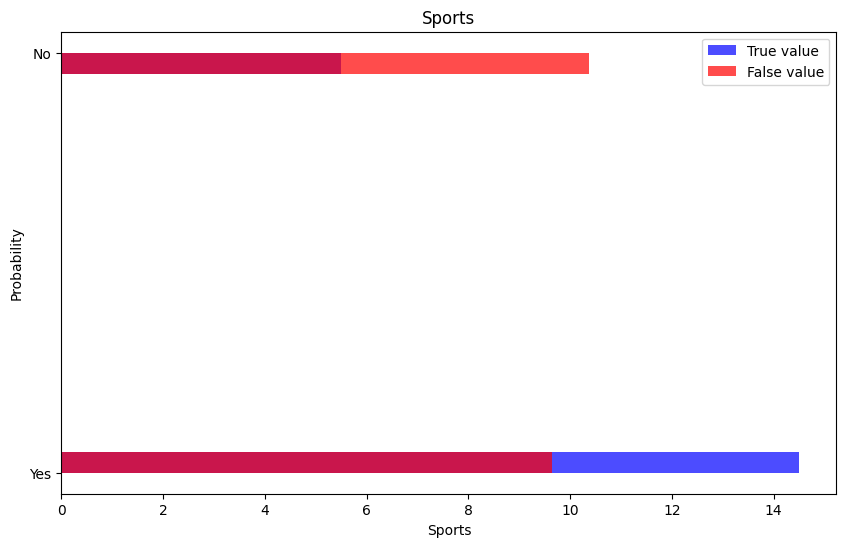

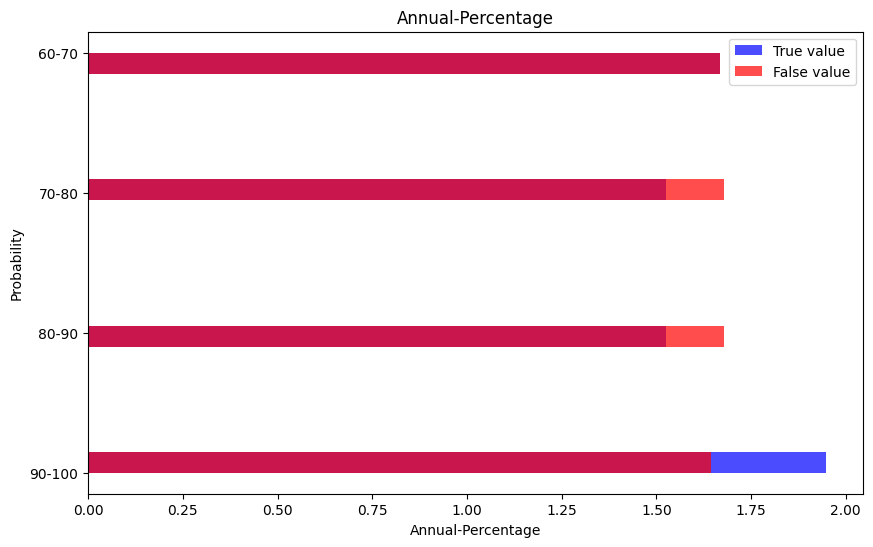

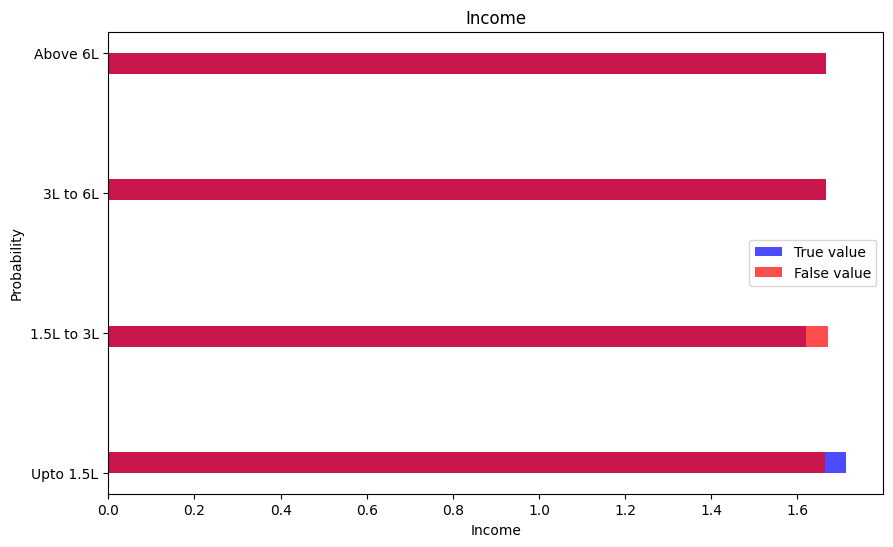

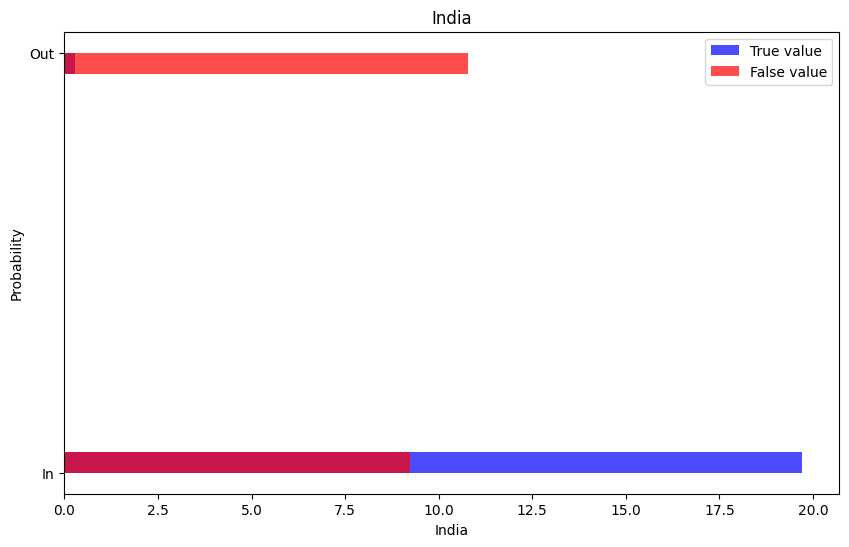

In [8]:
for label in cols[:-1]:
  plt.figure(figsize=(10,6))
  plt.hist(df[df["Outcome"]==1][label],bins=20, color='blue', label='True value', alpha=0.7, density=True,orientation='horizontal')
  plt.hist(df[df["Outcome"]==0][label],bins=20, color='red', label='False value', alpha=0.7, density=True,orientation='horizontal')
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [9]:
qualification_map={"Undergraduate":0,"Postgraduate":1,"Doctrate":2}
gender_map = {"Male":1,"Female":0}
community_map = {"SC/ST":0,"OBC":1,"General":2,"Minority":3}
annual_percentage_map = {"90-100":0,"80-90":1,"70-80":2,"60-70":3}
income_map = {"Upto 1.5L":0,"1.5L to 3L":1,"3L to 6L":2,"Above 6L":3}
india_map= {"In":0,"Out":1}
religion_map = {"Hindu":0,"Muslim":1,"Chirstian":2,"Others":3}
exservice_map={"Yes":1,"No":0}
disability_map={"Yes":1,"No":0}
sports_map={"Yes":1,"No":0}
scholarship_map = {'INSPIRE Scholarship': 0,'National Fellowship Disabilities':1,'Indira Gandhi Scholarship':2,'Abdul Kalam Fellowship':3,'AAI Sports Scholarship':4,'Glow and lovely Scholarship':5,'Dr. Ambedkar Scholarship':6,'National Overseas Scholarship':7,'Pragati Scholarship':8,'ONGC Sports Scholarship':9}

In [10]:
df2 = df.copy()

df2["Education Qualification"]=df2["Education Qualification"].map(qualification_map)
df2["Gender"]=df2["Gender"].map(gender_map)
df2["Community"]=df2["Community"].map(community_map)
df2["Annual-Percentage"]=df2["Annual-Percentage"].map(annual_percentage_map)
df2["Income"]=df2["Income"].map(income_map)
df2["Religion"]=df2["Religion"].map(religion_map)
df2["India"]=df2["India"].map(india_map)
df2["Exservice-men"]=df2["Exservice-men"].map(exservice_map)
df2["Disability"]=df2["Disability"].map(disability_map)
df2["Sports"]=df2["Sports"].map(sports_map)
df2["Name"]=df["Name"].map(scholarship_map)



In [11]:
df2.head()

,Name,Education Qualification,Gender,Community,Religion,Exservice-men,Disability,Sports,Annual-Percentage,Income,India,Outcome
0,0,0,1,2,0,1,1,1,0,0,0,1
1,0,0,1,2,0,1,1,0,0,0,0,1
2,0,0,1,2,1,1,1,1,0,0,0,1
3,0,0,1,2,1,1,1,0,0,0,0,1
4,0,0,1,2,2,1,1,1,0,0,0,1


In [12]:
df.shape

(245760, 12)

# Correlation Plot

<Axes: >

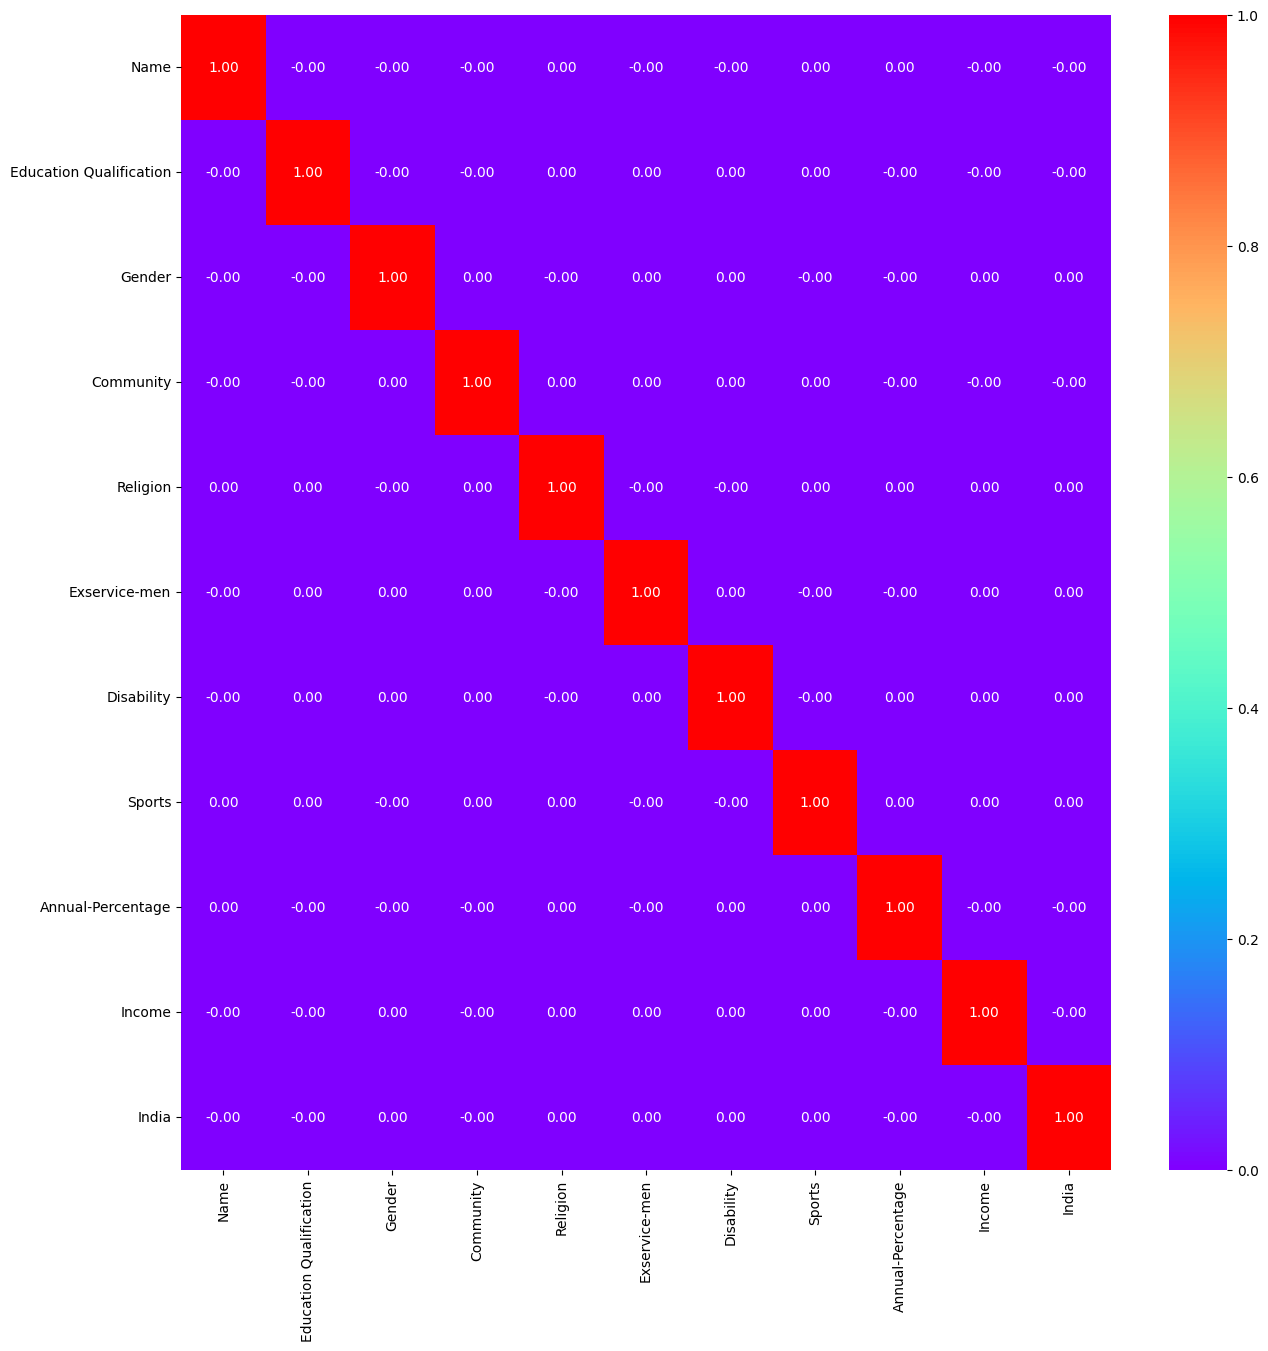

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.drop(columns=["Outcome"]).corr(),cmap="rainbow",fmt=".2f",annot=True)

# Train/valid/test dataset

In [17]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import log_loss

In [18]:
train, valid, test = np.split(df2.sample(frac=1), [int(0.6*len(df2)), int(0.8*len(df2))])

In [19]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y



def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [20]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# kNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn_model.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.13307698567708334

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     45607
           1       0.32      0.78      0.46      3545

    accuracy                           0.87     49152
   macro avg       0.65      0.83      0.69     49152
weighted avg       0.93      0.87      0.89     49152



# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [27]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.59      0.74     45607
           1       0.16      0.99      0.27      3545

    accuracy                           0.62     49152
   macro avg       0.58      0.79      0.51     49152
weighted avg       0.94      0.62      0.71     49152



In [28]:
mean_absolute_error(y_test, y_pred)

0.3830973307291667

# Log Regression

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [31]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     45607
           1       0.23      0.94      0.37      3545

    accuracy                           0.77     49152
   macro avg       0.61      0.85      0.62     49152
weighted avg       0.94      0.77      0.82     49152



In [32]:
mean_absolute_error(y_test, y_pred)

0.2298583984375

# SVM

In [120]:
from sklearn.svm import SVC

In [121]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [150]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     45536
           1       0.24      0.95      0.38      3616

    accuracy                           0.77     49152
   macro avg       0.62      0.86      0.62     49152
weighted avg       0.94      0.77      0.83     49152



# XGBoost Classifier

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
def check_test_score(model):
    y_pred=model.predict(X_test)
    print("R2 score is:", r2_score(y_test,y_pred))
    print("The mean squared error is :",mean_squared_error(y_test,y_pred))
    print("The mean absolute error is :",mean_absolute_error(y_test, y_pred))

In [40]:
from xgboost import XGBRegressor,XGBClassifier

In [41]:
xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
xgb = xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

In [42]:
print(classification_report(y_test, xgb_y_pred))
check_test_score(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45607
           1       0.98      1.00      0.99      3545

    accuracy                           1.00     49152
   macro avg       0.99      1.00      1.00     49152
weighted avg       1.00      1.00      1.00     49152

R2 score is: 0.9817591656540241
The mean squared error is : 0.001220703125
The mean absolute error is : 0.001220703125


In [43]:
mean_absolute_error(y_test, xgb_y_pred)

0.001220703125

# CatBoost Regressor

In [45]:
from catboost import CatBoostRegressor

In [46]:
cat_boost=CatBoostRegressor()
cat_boost.fit(X_train,y_train)

Learning rate set to 0.099325
0:	learn: 0.4638938	total: 98.6ms	remaining: 1m 38s
1:	learn: 0.4336184	total: 151ms	remaining: 1m 15s
2:	learn: 0.4067353	total: 214ms	remaining: 1m 11s
3:	learn: 0.3835716	total: 292ms	remaining: 1m 12s
4:	learn: 0.3615091	total: 350ms	remaining: 1m 9s
5:	learn: 0.3401720	total: 403ms	remaining: 1m 6s
6:	learn: 0.3208545	total: 468ms	remaining: 1m 6s
7:	learn: 0.3042826	total: 592ms	remaining: 1m 13s
8:	learn: 0.2899810	total: 658ms	remaining: 1m 12s
9:	learn: 0.2774036	total: 758ms	remaining: 1m 15s
10:	learn: 0.2667642	total: 830ms	remaining: 1m 14s
11:	learn: 0.2562773	total: 886ms	remaining: 1m 12s
12:	learn: 0.2481610	total: 951ms	remaining: 1m 12s
13:	learn: 0.2396639	total: 1.03s	remaining: 1m 12s
14:	learn: 0.2338429	total: 1.1s	remaining: 1m 12s
15:	learn: 0.2281033	total: 1.18s	remaining: 1m 12s
16:	learn: 0.2233384	total: 1.25s	remaining: 1m 12s
17:	learn: 0.2193156	total: 1.32s	remaining: 1m 11s
18:	learn: 0.2132535	total: 1.38s	remaining: 1m

In [47]:
check_test_score(cat_boost)

R2 score is: 0.9961062197549291
The mean squared error is : 0.00026057742880987873
The mean absolute error is : 0.006339390058103574


# RandomForest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [49]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
check_test_score(rf)

R2 score is: 1.0
The mean squared error is : 0.0
The mean absolute error is : 0.0


# DecisionTree Regressor

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [53]:
check_test_score(dt)

R2 score is: 1.0
The mean squared error is : 0.0
The mean absolute error is : 0.0


In [57]:
acc = (83,60,71,87,97,99,42,23)
loss = (16,40,29,13,3,1,47,53)
name = ("kNN","Naive","Log","SVM","Xgb","CatBoost","RandomForest","DecisionTree")

In [58]:
xpos = np.arange(len(acc))
xpos

array([0, 1, 2, 3, 4, 5, 6, 7])

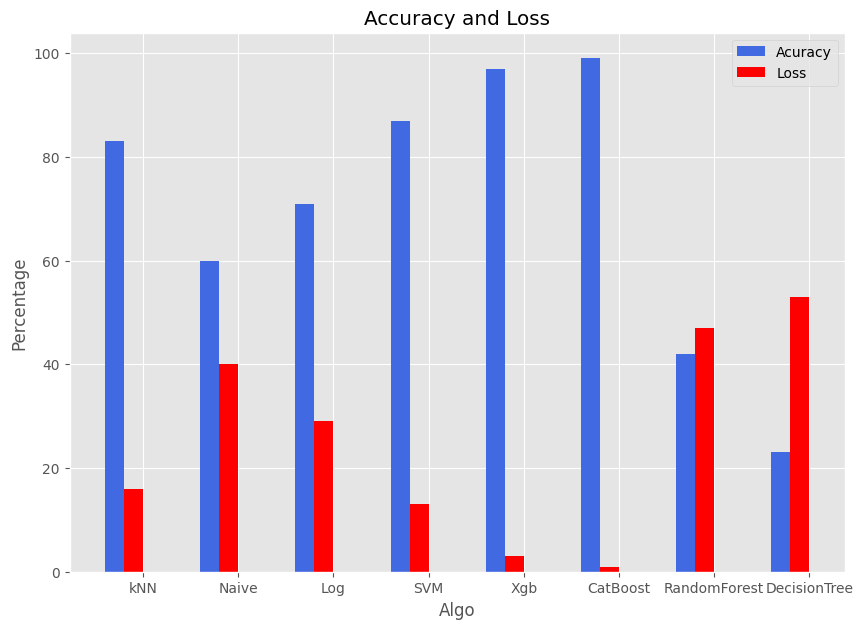

In [70]:
style.use('ggplot')
plt.figure(figsize=(10,7))
barWidth = 0.2
plt.bar(xpos, acc, color='royalblue', width = barWidth, label='Acuracy')
plt.bar(xpos+0.2, loss, color='red', width = barWidth, label='Loss')
plt.xticks(xpos+0.3, name)
plt.xlabel('Algo')
plt.ylabel('Percentage')
plt.title('Accuracy and Loss')
plt.legend()

# Fit model

In [60]:
import sklearn

X = df2[df2.columns[:-1]].values
y = df2[df2.columns[-1]].values
sc=StandardScaler()
X=sc.fit_transform(X)

In [61]:
model=CatBoostRegressor()

In [62]:
model.fit(X,y)

Learning rate set to 0.097697
0:	learn: 0.2465567	total: 55.3ms	remaining: 55.3s
1:	learn: 0.2334978	total: 104ms	remaining: 52.1s
2:	learn: 0.2222974	total: 163ms	remaining: 54.3s
3:	learn: 0.2127413	total: 233ms	remaining: 58s
4:	learn: 0.2047075	total: 343ms	remaining: 1m 8s
5:	learn: 0.1980887	total: 415ms	remaining: 1m 8s
6:	learn: 0.1916791	total: 501ms	remaining: 1m 11s
7:	learn: 0.1850471	total: 559ms	remaining: 1m 9s
8:	learn: 0.1801861	total: 620ms	remaining: 1m 8s
9:	learn: 0.1751109	total: 673ms	remaining: 1m 6s
10:	learn: 0.1714900	total: 732ms	remaining: 1m 5s
11:	learn: 0.1674074	total: 780ms	remaining: 1m 4s
12:	learn: 0.1637907	total: 834ms	remaining: 1m 3s
13:	learn: 0.1612461	total: 959ms	remaining: 1m 7s
14:	learn: 0.1591441	total: 1.17s	remaining: 1m 16s
15:	learn: 0.1558492	total: 1.27s	remaining: 1m 18s
16:	learn: 0.1538971	total: 1.33s	remaining: 1m 17s
17:	learn: 0.1517440	total: 1.39s	remaining: 1m 15s
18:	learn: 0.1482269	total: 1.43s	remaining: 1m 14s
19:	le

In [63]:
model.score(X_test,y_test)

0.9978141542267114

In [64]:
Pause=True
while Pause:
    values=[]
    a=input("Educational Qualification")
    values.append(qualification_map[a])
    a = input("Gender")
    values.append(gender_map[a])
    a = input("Community")
    values.append(community_map[a])
    a = input("Religion")
    values.append(religion_map[a])
    a = input("Exservice-men[Yes/No]")
    values.append(exservice_map[a])
    a = input("Disability[Yes/No]")
    values.append(disability_map[a])
    a = input("Sports[Yes/No]")
    values.append(sports_map[a])
    a = input("Annual Percentage")
    values.append(annual_percentage_map[a])
    a = input("Income")
    values.append(income_map[a])
    a = input("India/Abroad[In/Out]")
    values.append(india_map[a])
    Pause=False


In [65]:
from array import *
df=[]
df=values.copy()
scholarship=['INSPIRE Scholarship', 'National Fellowship Disabilities', 'Indira Gandhi Scholarship', 'Abdul Kalam Fellowship', 'AAI Sports Scholarship', 'Glow and lovely Scholarship', 'Dr. Ambedkar Scholarship', 'National Overseas Scholarship', 'Pragati Scholarship', 'ONGC Sports Scholarship']
arr=[]
for i in range(len(scholarship)):
  col = []
  col.append(i)
  for j in values:
    col.append(j)
  arr.append(col)



In [66]:
eligible_scholarship =[]

for i in range(len(scholarship)):
  val = sc.transform([arr[i]])
  output = model.predict(val).item()
  if(output>0):
    eligible_scholarship.append(scholarship[i])

print(eligible_scholarship)

['INSPIRE Scholarship', 'National Fellowship Disabilities', 'Abdul Kalam Fellowship', 'AAI Sports Scholarship', 'Glow and lovely Scholarship', 'Dr. Ambedkar Scholarship', 'ONGC Sports Scholarship']


In [67]:
import pickle

In [68]:
pickle.dump(model,open('scholar.pkl','wb'))

In [69]:
pickled_model=pickle.load(open('scholar.pkl','rb'))